This notebook is used to generate the animations used in the **gaussian_processes** and **noise_gaussian_processes** notebooks. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
import datetime
%matplotlib qt5

### Figure 1: Sampling the unknown function

In [2]:
def true_func(x):
    return 0.1*((8*np.exp(-0.0125*x))*np.sin(x*0.25) + 0.055*x + 50*np.exp(-10/(1+0.25*x)) -
                0.005*(x-50)**2)  - 1.5

In [3]:
#This is the original sampling space
x = np.linspace(0,150,400)

#### Basic search strategies

In [4]:
grid_x = np.arange(0,x.shape[0],5)
random_x = np.random.randint(0,x.shape[0],size=80) 

In [5]:
#Set pyplot parameters
params = {'axes.labelsize' : 'large',
         'xtick.labelsize' : 'x-large',
         'ytick.labelsize' : 'x-large'}
plt.rcParams.update(params)

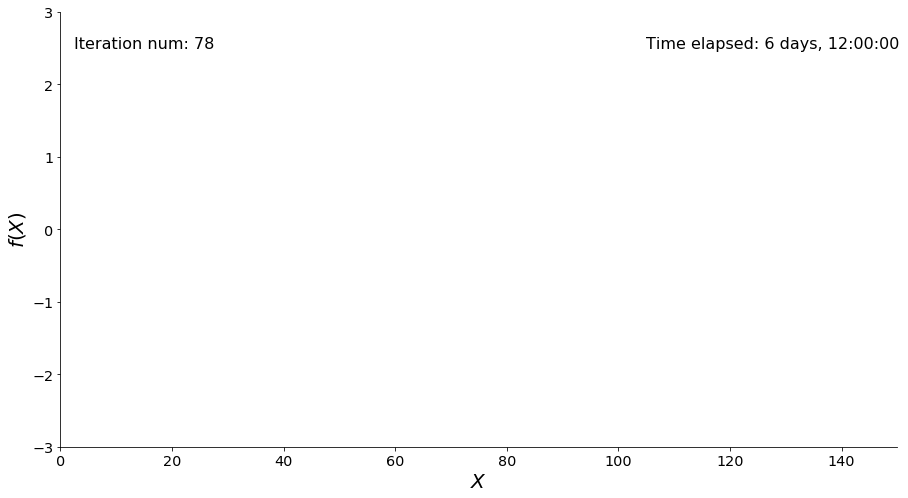

In [13]:
#Select sampling strategy
point_map = grid_x

#Make canvas
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

#Initialization
init_arr = np.empty_like(x)
init_arr[:] = np.nan

#Make artists
line, = ax.plot(x,init_arr,'ko',markersize=6)
txt = ax.text(2.5,2.5,'Iteration num: 0',fontsize=16)
txt_2 = ax.text(105,2.5, 'Time elapsed: 0', fontsize=16)

def init():
    line.set_ydata([np.nan] * x.shape[0])
    return line,
    
#Iteratively plot
def animate(i):
    
    #Update init_arr
    init_arr[point_map[i]] = true_func(x[point_map[i]])
    line.set_ydata(init_arr)
    txt.set_text('Iteration num: {}'.format(i))
    txt_2.set_text('Time elapsed: {}'.format(str(datetime.timedelta(seconds=i*(2*60*60)))))
    return line,txt,txt_2


ani = animation.FuncAnimation(fig, animate, init_func=init, blit=False,
                             interval=100, frames=79)

#Set properties
ax.set_ylim(-3,3)
ax.set_xlim(0,150)
ax.set_xlabel(r'$X$',fontsize=20)
ax.set_ylabel(r'$f(X)$', fontsize=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ani.save('./figures/grid_sampling.gif',writer='imagemagick',)
plt.show()